In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt

In [13]:
# import data from Kaggle and save to project folder
df = pd.read_csv("C:\\Users\\beth_\\Documents\\insurance.csv")
df.to_csv("C:\\Users\\beth_\\Documents\\health-insurance\\health-insurance-project-1\\data\\insurance_raw.csv", index=False)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
# start to find out about the data
df.shape

(1338, 7)

In [ ]:
# get a feel for the data types and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
# see what the summary statistics look like
# looking at the minimum and maximum values to see if there are any obvious anomalies, which there aren't
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
# see if there are any missing values
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

* there are no missing values to deal with
* depending on the type of missing values, if there were any I would consider replacing with the median or modal value as the data set is not that large it would be a shame to delete whole rows

In [14]:
# rename "sex" column to "gender"
df = df.rename(columns={"sex": "gender"})
df.head()

,age,gender,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [15]:
# declare categorical types where they are object
# this will help with memory usage and clarity
category_cols = ["gender", "smoker", "region"]
for cat in category_cols:
    df[cat] = df[cat].astype("category")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       1338 non-null   int64   
 1   gender    1338 non-null   category
 2   bmi       1338 non-null   float64 
 3   children  1338 non-null   int64   
 4   smoker    1338 non-null   category
 5   region    1338 non-null   category
 6   charges   1338 non-null   float64 
dtypes: category(3), float64(2), int64(2)
memory usage: 46.3 KB


In [ ]:
# check for duplicates
dupes = df.duplicated().sum()
print("Duplicate rows: ", dupes) 
duplicates_all = df[df.duplicated(keep=False)]
print(duplicates_all)



Duplicate rows:  1
1
     age gender    bmi  children smoker     region    charges
195   19   male  30.59         0     no  northwest  1639.5631
581   19   male  30.59         0     no  northwest  1639.5631


* looking at the duplicates, it would appear to be an error the charges are idential to 4 decimal places
* therefore I have decided to drop the duplicate row

In [ ]:
# drop the duplicate row and modify the dataframe in place
df.drop_duplicates(df, keep='first', inplace=True)
df.shape

(1337, 7)

In [16]:
# look at correlations between numerical variables
# need to one-hot encode categorical variables first
encoded_df = pd.get_dummies(df, drop_first=True)
df_corr = encoded_df.corr(method='pearson')
df_corr.head()

,age,bmi,children,charges,gender_male,smoker_yes,region_northwest,region_southeast,region_southwest
age,1.000000,0.109272,0.042469,0.299008,-0.020856,-0.025019,-0.000407,-0.011642,0.010016
bmi,0.109272,1.000000,0.012759,0.198341,0.046371,0.003750,-0.135996,0.270025,-0.006205
children,0.042469,0.012759,1.000000,0.067998,0.017163,0.007673,0.024806,-0.023066,0.021914
charges,0.299008,0.198341,0.067998,1.000000,0.057292,0.787251,-0.039905,0.073982,-0.043210
gender_male,-0.020856,0.046371,0.017163,0.057292,1.000000,0.076185,-0.011156,0.017117,-0.004184


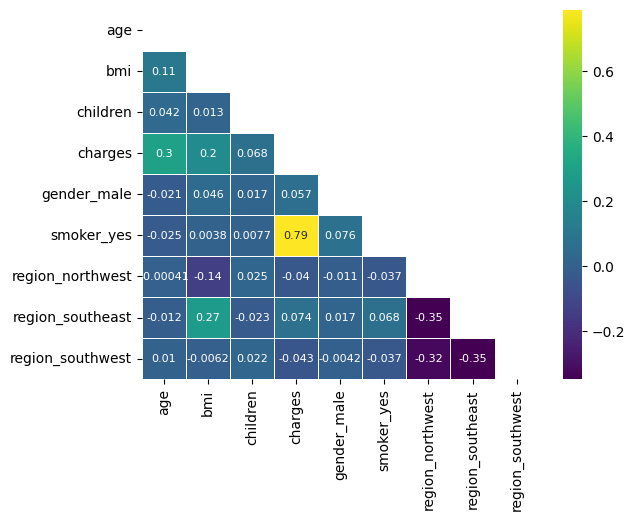

In [17]:
# visualize the correlations with a heatmap
# a quick way to mask the upper triangle
# get a feel for which variables are most correlated
mask = np.zeros_like(df_corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(df_corr,annot=True,mask=mask,cmap='viridis',annot_kws={"size": 8},linewidths=0.5)
plt.ylim(df_corr.shape[1],0);
plt.show()


* It's already immediately obvious that smoking has a large correlation with insurance charges


* using the nhs uk website and the general bmi categories

In [23]:
# create new categories for bmi
df['bmi_category'] = pd.cut(df['bmi'], bins=[0, 18.5, 24.9, 29.9, 39.9, np.inf],
                             labels=['underweight', 'healthy weight', 'overweight', 'obese', 'severely obese'],
                             right=False)
df['bmi_category'] = df['bmi_category'].astype("category")
df.head()

,age,gender,bmi,children,smoker,region,charges,bmi_category
0,19,female,27.900,0,yes,southwest,16884.92400,overweight
1,18,male,33.770,1,no,southeast,1725.55230,obese
2,28,male,33.000,3,no,southeast,4449.46200,obese
3,33,male,22.705,0,no,northwest,21984.47061,healthy weight
4,32,male,28.880,0,no,northwest,3866.85520,overweight


In [24]:
# save cleaned data to project folder
df.to_csv("C:\\Users\\beth_\\Documents\\health-insurance\\health-insurance-project-1\\data\\insurance_cleaned.csv", index=False)